In [26]:
import numpy as np
import matplotlib.pyplot as plt
#for generating random numbers
from numpy.random import seed, randint
from functions import generate_single_exp, stretch_exp_fit, double_exp_fit, single_exp_fit
import math

In [2]:
"""Recycle params for plotting"""
plt.rc('xtick', labelsize = 30)
plt.rc('xtick.major', pad = 3)
plt.rc('ytick', labelsize = 30)
plt.rc('lines', lw = 3.5, markersize = 20.5)
plt.rc('legend', fontsize = 30)
plt.rc('axes', linewidth = 3.5)

### Generate random array of lifetime values

In [3]:
seed(10)
tau_vals = randint(1,1000,100)*1e-9 # convert to s

Text(0.5, 0, 'Tau values (ns)')

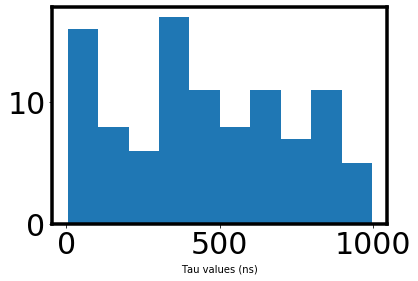

In [4]:
plt.figure()
plt.hist(tau_vals*1e9)
plt.xlabel("Tau values (ns)")

### Generate time array

In [5]:
t = np.linspace(0,10000,num=1000)*1e-9 # converted to s

### Generate single exponentials and average them to see the stretched behavior

In [6]:
I_vals = []

for i in range(len(tau_vals)):
    I_vals.append(generate_single_exp(t,tau_vals[i]))
    
I_vals = np.asarray(I_vals)
#Average Trace
I_avg = np.average(I_vals,axis=0)

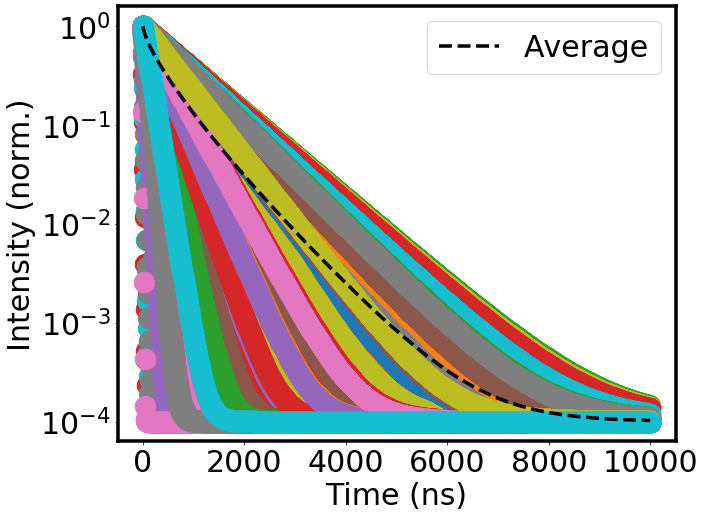

In [7]:
plt.figure(figsize=(10,8))
for i in range(len(tau_vals)):
    plt.plot(t*1e9,I_vals[i],'o')
plt.plot(t*1e9,I_avg,'k--', label="Average")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

### Fit average decay with stretched exponential, double exponential and single exponential 

In [8]:
stretched_exp = stretch_exp_fit(I_avg/np.max(I_avg), t)
print("tau_c (ns) = "+str(stretched_exp[0]*1e9))
print("Beta = "+str(stretched_exp[1]))
print("avg. tau (ns) = "+str(stretched_exp[3]*1e9))

tau_c (ns) = 410.11820144240187
Beta = 0.7828463475732753
avg. tau (ns) = 472.10769635808225


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:31: RuntimeWarning: divide by zero encountered in double_scalars
  return ((a * np.exp(-((1.0 / tc) * t) ** beta)) + noise)
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:31: RuntimeWarning: invalid value encountered in multiply
  return ((a * np.exp(-((1.0 / tc) * t) ** beta)) + noise)


In [9]:
double_exp = double_exp_fit(I_avg/np.max(I_avg), t)
print("tau1 (ns) = "+str(double_exp[0]*1e9))
print("a1 = "+str(double_exp[1]))
print("tau2 (ns) = "+str(double_exp[2]*1e9))
print("a2 = "+str(double_exp[3]))
print("avg. tau (ns) = "+str(double_exp[4]*1e9))

tau1 (ns) = 245.35327557551884
a1 = 0.4519808425270824
tau2 (ns) = 746.3309890127839
a2 = 0.463271484576714
avg. tau (ns) = 498.9321872821358


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:71: RuntimeWarning: divide by zero encountered in double_scalars
  return (a * np.exp(-((1.0 / tau)*t) ))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:71: RuntimeWarning: invalid value encountered in multiply
  return (a * np.exp(-((1.0 / tau)*t) ))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:91: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:91: RuntimeWarning: overflow encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


In [10]:
single_exp = single_exp_fit(I_avg/np.max(I_avg), t)
print("tau (ns) = "+str(single_exp[0]*1e9))
print("a = "+str(single_exp[1]))
print("avg. tau (ns) = "+str(single_exp[2]*1e9))

tau (ns) = 613.8097190527983
a = 0.7481102254097284
avg. tau (ns) = 613.8097190527983


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:116: RuntimeWarning: divide by zero encountered in double_scalars
  return (a * np.exp(-((1.0 / tau)*t)) + noise)
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:116: RuntimeWarning: invalid value encountered in multiply
  return (a * np.exp(-((1.0 / tau)*t)) + noise)


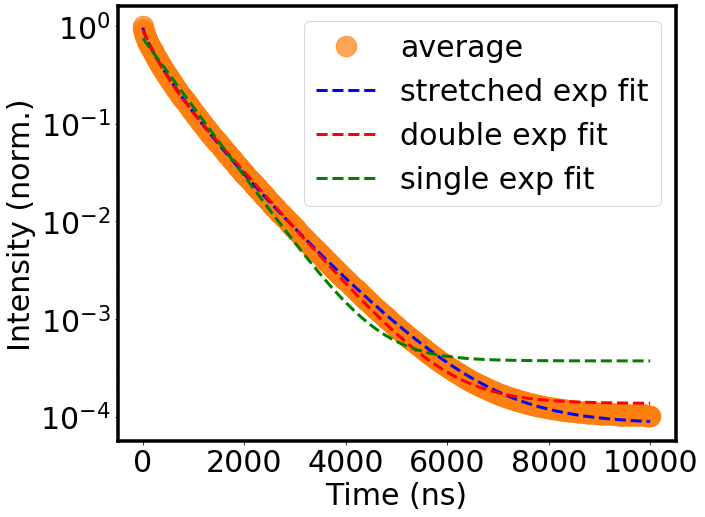

In [11]:
# plot
plt.figure(figsize=(10,8))
plt.plot(t*1e9, I_avg/np.max(I_avg),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t*1e9, single_exp[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

### Create a random np array of 20 lifetimes with values far apart from one another

In [12]:
tau_far = np.array([2, 955, 422, 49, 544, 245, 111, 643, 765, 976, 1002, 408, 87, 872, 175, 303, 645, 226, 677, 788])*1e-9

In [43]:
tau_far

array([2.000e-09, 9.550e-07, 4.220e-07, 4.900e-08, 5.440e-07, 2.450e-07,
       1.110e-07, 6.430e-07, 7.650e-07, 9.760e-07, 1.002e-06, 4.080e-07,
       8.700e-08, 8.720e-07, 1.750e-07, 3.030e-07, 6.450e-07, 2.260e-07,
       6.770e-07, 7.880e-07])

Text(0.5, 0, 'Tau values (ns)')

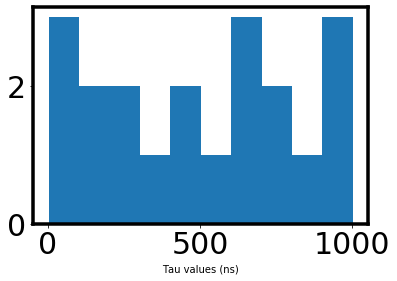

In [13]:
plt.figure()
plt.hist(tau_far*1e9)
plt.xlabel("Tau values (ns)")

### Take the average of all the single exponetial of each of the 20 lifetimes

In [14]:
t_far = np.linspace(0,10000,num=1000)*1e-9

In [15]:
I_values = []

for i in range(len(tau_far)):
    I_values.append(generate_single_exp(t_far,tau_far[i]))
    
I_values = np.asarray(I_values)
I_average = np.average(I_values,axis=0)

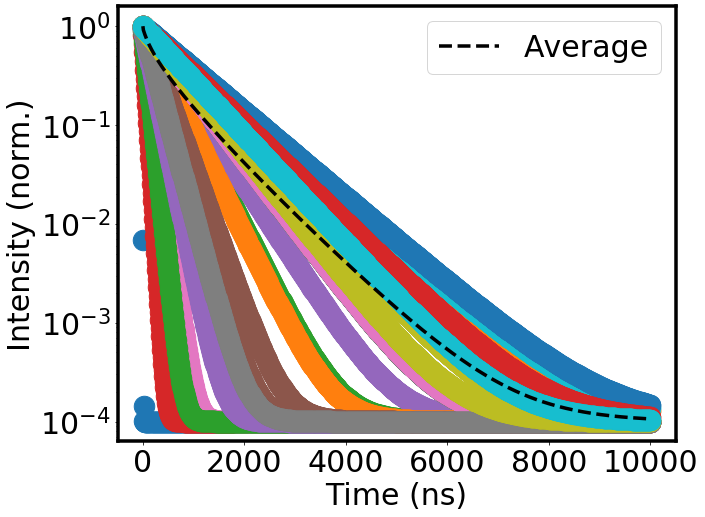

In [25]:
plt.figure(figsize=(10,8))
for i in range(len(tau_far)):
    plt.plot(t_far*1e9,I_values[i],'o')
plt.plot(t_far*1e9,I_average,'k--', label="Average")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

In [18]:
far_stretched_exp = stretch_exp_fit(I_average/np.max(I_average), t_far)
print("tau_c (ns) = "+str(far_stretched_exp[0]*1e9))
print("Beta = "+str(far_stretched_exp[1]))
print("avg. tau (ns) = "+str(far_stretched_exp[3]*1e9))

tau_c (ns) = 455.46825631390044
Beta = 0.7753045179424234
avg. tau (ns) = 528.1776716999125


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:47: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


In [19]:
far_double_exp = double_exp_fit(I_average/np.max(I_average), t_far)
print("tau1 (ns) = "+str(far_double_exp[0]*1e9))
print("a1 = "+str(far_double_exp[1]))
print("tau2 (ns) = "+str(far_double_exp[2]*1e9))
print("a2 = "+str(far_double_exp[3]))
print("avg. tau (ns) = "+str(far_double_exp[4]*1e9))

tau1 (ns) = 225.72993518166192
a1 = 0.4257323475921203
tau2 (ns) = 821.0612539015992
a2 = 0.48599089810038254
avg. tau (ns) = 543.069219464393


In [20]:
far_single_exp = single_exp_fit(I_average/np.max(I_average), t_far)
print("tau (ns) = "+str(far_single_exp[0]*1e9))
print("a = "+str(far_single_exp[1]))
print("avg. tau (ns) = "+str(far_single_exp[2]*1e9))

tau (ns) = 692.3991105111563
a = 0.7182040865746182
avg. tau (ns) = 692.3991105111563


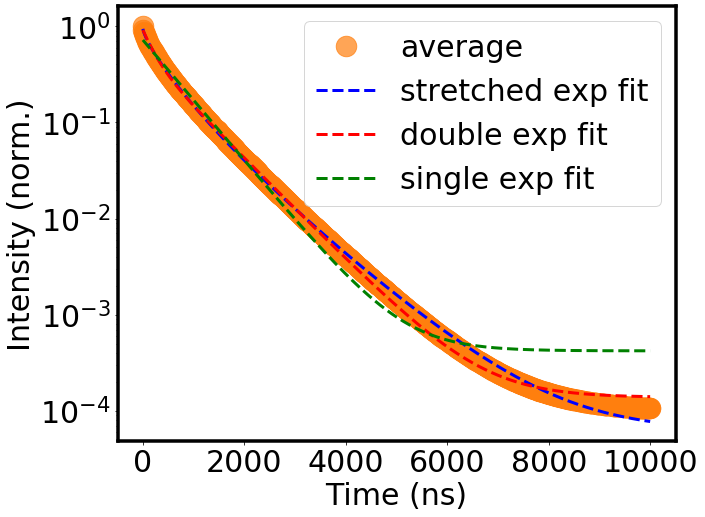

In [21]:
# plot
plt.figure(figsize=(10,8))
plt.plot(t_far*1e9, I_average/np.max(I_average),'C1o', alpha=0.7,label="average")
plt.plot(t_far*1e9, far_stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t_far*1e9, far_double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t_far*1e9, far_single_exp[3], 'g--', lw = 3, label="single exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()

### Calculate the SRV for each lifetime of the 20 data series

From *Jian, Sarthak, ACS Energy Lett. 2019, 4, 222−227* I took the equation to calculate the SRV.

The average tau I calculated above is the same as the tau effective of the paper. This means that is equal to the sum of the reciprocal of the lifetime in the bulk and in the surface:

$\frac{1}{\tau_{eff}}$ = $\frac{1}{\tau_{b}}$ + $\frac{1}{\tau_{s}}$

The $\tau_{s}$ comes to play in the surface recombination velocity calculation along with *W* (thickness) and *D* (diffusion constant) 

*D* can be measured by the Einstein relationship: 

$D = \mu\cdot K_{b}\cdot T$

Where *$\mu$* is the measured carrier mboility values. 

There are two equations used to calculate SRV which describe two different device cases:

**1) $SRV_{1}$ is approximated to zero**

when the SRV on one contact is much greater than the other one on the other contact

$\tau_{s}$ = $\frac{W}{SRV_{2}}$ + $\frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2$

***equation 1*** : $SRV_{2}$ = $\frac{W}{\tau_{s} - \frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2}$ 

**1) $SRV_{1}$ = $SRV_{2}$ is approximated to zero**

SRV at the top and the bottom interfaces are the same

$\tau_{s}$ = $\frac{W}{2SRV}$ + $\frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2$

***equation 2*** : $SRV$ = $\frac{W}{2 \left[ \tau_{s} - \frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2 \right]}$ 

I considered the values of the previous studied films of *$Cs_{17}Br_{15}$* :

- $\mu$ = 35 $cm^2 V^{-1} s^{-1}$
- $D$ = 0.9 $cm^2 s^{-1}$
- $W$ = 400 $nm$ = 0.00004 $cm$

Approaches to calculate $\tau_{b}$ : 

1) One approach to determine $\tau_{b}$  is to measure and extrapolate $\tau_{b}$ from a very thick sample series  where bulk recombination dominates over surface recombination. 

2) The second approach is the Lewis base passivation using TOPO on MAPI which only bound the surface. For this reason, all the remaining recomination that decrease the PLQE is due to the bulk. 
This method allows us to establish a lower limit for the corresponding bulk lifetime ($\tau_{b}$  > 8 μ s) because surface passivation alone can restore well-prepared samples to such levels of performance. 

***equation 1*** : $SRV_{2}$ = $\frac{W}{\tau_{s} - \frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2}$ 

In [65]:
tau_eff = tau_far

In [66]:
tau_eff

array([2.000e-09, 9.550e-07, 4.220e-07, 4.900e-08, 5.440e-07, 2.450e-07,
       1.110e-07, 6.430e-07, 7.650e-07, 9.760e-07, 1.002e-06, 4.080e-07,
       8.700e-08, 8.720e-07, 1.750e-07, 3.030e-07, 6.450e-07, 2.260e-07,
       6.770e-07, 7.880e-07])

In [67]:
def SRV_eq1(tau_eff):
    srv = 0.00004/(tau_eff - ((4/0.9)*(math.pow((0.00004/3.14), 2))))
    return srv

In [68]:
SRV1 = []
for i in tau_eff:
    srv = SRV_eq1(i)
    SRV1.append(srv)
SRV1

[31280.236320950924,
 41.916473008468124,
 94.94900654849441,
 828.5216469631919,
 73.62702675864384,
 163.7473497696898,
 362.71716343507336,
 62.27825411938342,
 52.33692462914638,
 41.013914717620914,
 39.9489148171296,
 98.21283028143269,
 463.6135097462838,
 45.909531726956736,
 229.51735126127798,
 132.32818488604977,
 62.08492707611194,
 177.55779336452775,
 59.1472070470924,
 50.80792458052905]

***equation 2*** : $SRV$ = $\frac{W}{2 \left[ \tau_{s} - \frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2 \right]}$ 

In [69]:
def SRV_eq2(tau_eff):
    srv = 0.00004/(2*(tau_eff - ((4/0.9)*(math.pow((0.00004/3.14), 2)))))
    return srv

In [70]:
SRV2 = []
for i in tau_eff:
    srv = SRV_eq2(i)
    SRV2.append(srv)
SRV2

[15640.118160475462,
 20.958236504234062,
 47.474503274247205,
 414.26082348159593,
 36.81351337932192,
 81.8736748848449,
 181.35858171753668,
 31.13912705969171,
 26.16846231457319,
 20.506957358810457,
 19.9744574085648,
 49.106415140716344,
 231.8067548731419,
 22.954765863478368,
 114.75867563063899,
 66.16409244302488,
 31.04246353805597,
 88.77889668226388,
 29.5736035235462,
 25.403962290264523]

- Calculating the average of the SRV calculated in equation one and two

In [78]:
np.average(SRV1,axis=0)

1718.0236127844012

In [79]:
np.average(SRV2,axis=0)

859.0118063922006

- Calculating SRV from the average of the tau_eff array

In [95]:
tau_math_avg = np.average(tau_far, axis=0)
tau_math_avg

4.9475e-07

In [96]:
SRV_eq1(4.9475e-07)

80.96694568951217

In [97]:
SRV_eq2(4.9475e-07)

40.483472844756086

#### SRV from average tau of streched exponential fitting:

avg. tau (ns) = 528.1776716999125 

avg. tau (s) = 5.282e-7 

In [82]:
SRV_eq1(5.282e-7)

75.83243691922263

In [80]:
SRV_eq2(5.282e-7)

37.916218459611315

#### SRV from average tau of double exponential fitting:

Avg. tau (ns) = 543.069219464393

Avg. tau (s) = 5.431e-7

In [83]:
SRV_eq1(5.431e-7)

73.74920028135107

In [84]:
SRV_eq2(5.431e-7)

36.87460014067553

#### SRV from average tau of single exponential fitting:

Avg. tau (ns) = 692.3991105111563

Avg. tau (s) = 6.924e-7

In [85]:
SRV_eq1(6.924e-7)

57.830313949281155

In [86]:
SRV_eq2(6.924e-7)

28.915156974640578

### Conclusion:

For both SRV average and tau average, the most accurate SRV calculation is given by the streched exponential fitting